### Import All Libraries 
required in Linear regression

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
sns.set(color_codes=True)

In [4]:
#let see some head of our datasets
df = pd.read_excel('merged_data.xlsx')
df.head()

,Unnamed: 0,State,AreaName,All_Poverty,M_Poverty,F_Poverty,FIPS,Med_Income,Med_Income_White,Med_Income_Black,...,F_Without,All_With,All_Without,fips_x,Incidence_Rate,Avg_Ann_Incidence,recent_trend,fips_y,Mortality_Rate,Avg_Ann_Deaths
0,0,AK,"Aleutians East Borough, Alaska",553,334,219,2013,61518.0,72639.0,31250.0,...,540,1442,1857,2013,*,3 or fewer,*,2013,*,*
1,1,AK,"Aleutians West Census Area, Alaska",499,273,226,2016,84306.0,97321.0,93750.0,...,564,4177,1333,2016,*,3 or fewer,*,2016,*,*
2,2,AK,"Anchorage Municipality, Alaska",23914,10698,13216,2020,78326.0,87235.0,50535.0,...,21393,243173,44638,2020,61.5,131,stable,2020,47.3,96
3,3,AK,"Bethel Census Area, Alaska",4364,2199,2165,2050,51012.0,92647.0,73661.0,...,1774,13023,4482,2050,62.7,6,stable,2050,58.3,5
4,4,AK,"Bristol Bay Borough, Alaska",69,33,36,2060,79750.0,88000.0,NaN,...,67,768,191,2060,*,3 or fewer,*,2060,*,*


### as we see it from the head of dataset the unnamed column was just like counter so  which is not that much important so we will drop that column

In [3]:
df.drop('Unnamed: 0' ,axis=1, inplace=True)
df.head()

,State,AreaName,All_Poverty,M_Poverty,F_Poverty,FIPS,Med_Income,Med_Income_White,Med_Income_Black,Med_Income_Nat_Am,...,F_Without,All_With,All_Without,fips_x,Incidence_Rate,Avg_Ann_Incidence,recent_trend,fips_y,Mortality_Rate,Avg_Ann_Deaths
0,AK,"Aleutians East Borough, Alaska",553,334,219,2013,61518.0,72639.0,31250.0,54750.0,...,540,1442,1857,2013,*,3 or fewer,*,2013,*,*
1,AK,"Aleutians West Census Area, Alaska",499,273,226,2016,84306.0,97321.0,93750.0,48750.0,...,564,4177,1333,2016,*,3 or fewer,*,2016,*,*
2,AK,"Anchorage Municipality, Alaska",23914,10698,13216,2020,78326.0,87235.0,50535.0,53935.0,...,21393,243173,44638,2020,61.5,131,stable,2020,47.3,96
3,AK,"Bethel Census Area, Alaska",4364,2199,2165,2050,51012.0,92647.0,73661.0,41594.0,...,1774,13023,4482,2050,62.7,6,stable,2050,58.3,5
4,AK,"Bristol Bay Borough, Alaska",69,33,36,2060,79750.0,88000.0,NaN,63333.0,...,67,768,191,2060,*,3 or fewer,*,2060,*,*


In [4]:
# how many instances we have in our data
len(df)

3134

## from the instances we can understood that our data have 3134 instance if  it's less than this one it means it containes some null value

In [5]:
# how many features(columns) we have in our data
len(df.columns)

25

In [6]:
# Info method give us overall about the data either about data types or memory usage by data, or even if some columns has null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3134 entries, 0 to 3133
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   State              3134 non-null   object 
 1   AreaName           3134 non-null   object 
 2   All_Poverty        3134 non-null   int64  
 3   M_Poverty          3134 non-null   int64  
 4   F_Poverty          3134 non-null   int64  
 5   FIPS               3134 non-null   int64  
 6   Med_Income         3133 non-null   float64
 7   Med_Income_White   3132 non-null   float64
 8   Med_Income_Black   1924 non-null   float64
 9   Med_Income_Nat_Am  1474 non-null   float64
 10  Med_Income_Asian   1377 non-null   float64
 11  Hispanic           2453 non-null   float64
 12  M_With             3134 non-null   int64  
 13  M_Without          3134 non-null   int64  
 14  F_With             3134 non-null   int64  
 15  F_Without          3134 non-null   int64  
 16  All_With           3134 

# Note !
our total instances are 3134 from that concept We can noticed that there are some floating points columns with null values we need to handle :

- Med_Income              
- Med_Income_White        
- Med_Income_Black     
- Med_Income_Nat_Am    
- Med_Income_Asian     
- Hispanic    



In [7]:
# lets also see how many null values in each of these columns.
df.isnull().sum()

State                   0
AreaName                0
All_Poverty             0
M_Poverty               0
F_Poverty               0
FIPS                    0
Med_Income              1
Med_Income_White        2
Med_Income_Black     1210
Med_Income_Nat_Am    1660
Med_Income_Asian     1757
Hispanic              681
M_With                  0
M_Without               0
F_With                  0
F_Without               0
All_With                0
All_Without             0
fips_x                  0
Incidence_Rate          0
Avg_Ann_Incidence       0
recent_trend            0
fips_y                  0
Mortality_Rate          0
Avg_Ann_Deaths          0
dtype: int64

## Handle Nan values

So handle null values in floating point varaibles can be done in different ways may be :
- Using mean (If its Normal or left skweed)
- Using Median (Right skweed)
- Other method


### First handle two features

These two features has just 1 and 2 null values so either to drop these rows or just replace with mean or median its not a problem.


In [8]:
# Handle Null values
df['Med_Income']       = df['Med_Income'].fillna(df['Med_Income'].median())

df['Med_Income_White'] = df['Med_Income_White'].fillna(df['Med_Income_White'].median())

In [9]:
# Now we can see that these two columns has no null values
df.isnull().sum()

State                   0
AreaName                0
All_Poverty             0
M_Poverty               0
F_Poverty               0
FIPS                    0
Med_Income              0
Med_Income_White        0
Med_Income_Black     1210
Med_Income_Nat_Am    1660
Med_Income_Asian     1757
Hispanic              681
M_With                  0
M_Without               0
F_With                  0
F_Without               0
All_With                0
All_Without             0
fips_x                  0
Incidence_Rate          0
Avg_Ann_Incidence       0
recent_trend            0
fips_y                  0
Mortality_Rate          0
Avg_Ann_Deaths          0
dtype: int64

### Second handle four features

- Med_Income_Black has (1210 null value)
- Med_Income_Nat_Am has (1660 null value)
- Med_Income_Asian has (1757 null value)
- Hispanic has (681 null value)


array([[<AxesSubplot: title={'center': 'Med_Income_Black'}>,
        <AxesSubplot: title={'center': 'Med_Income_Nat_Am'}>],
       [<AxesSubplot: title={'center': 'Med_Income_Asian'}>,
        <AxesSubplot: title={'center': 'Hispanic'}>]], dtype=object)

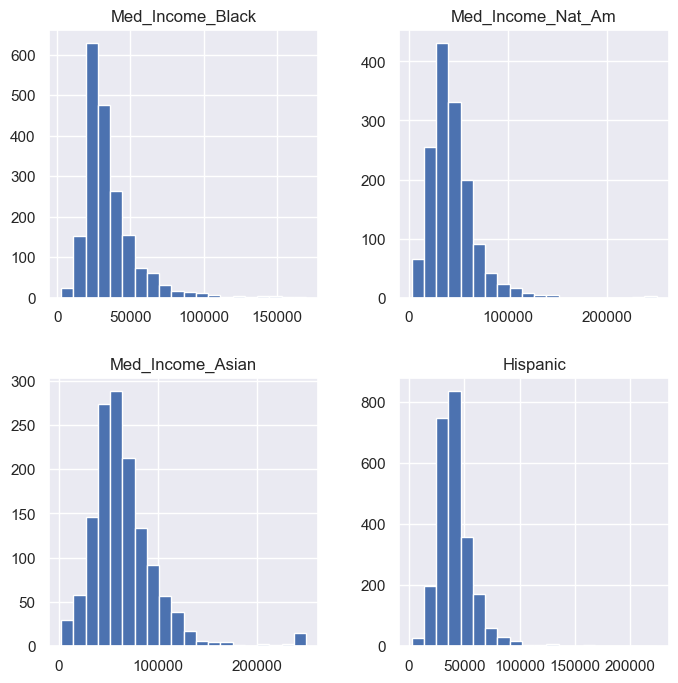

In [10]:
df[['Med_Income_Black', 'Med_Income_Nat_Am', 'Med_Income_Asian', 'Hispanic']].hist(
                            bins=20, figsize=(8, 8))

In [11]:
# Handle Null values with median as these features are skewed to right or left
df['Med_Income_Black']  = df['Med_Income_Black'].fillna(df['Med_Income_Black'].median())

df['Med_Income_Nat_Am'] = df['Med_Income_Nat_Am'].fillna(df['Med_Income_Nat_Am'].median())

df['Med_Income_Asian']  = df['Med_Income_Asian'].fillna(df['Med_Income_Asian'].median())

df['Hispanic']          = df['Hispanic'].fillna(df['Hispanic'].median())

In [12]:
# Now we can see that these two columns has no null values
df.isnull().sum()

State                0
AreaName             0
All_Poverty          0
M_Poverty            0
F_Poverty            0
FIPS                 0
Med_Income           0
Med_Income_White     0
Med_Income_Black     0
Med_Income_Nat_Am    0
Med_Income_Asian     0
Hispanic             0
M_With               0
M_Without            0
F_With               0
F_Without            0
All_With             0
All_Without          0
fips_x               0
Incidence_Rate       0
Avg_Ann_Incidence    0
recent_trend         0
fips_y               0
Mortality_Rate       0
Avg_Ann_Deaths       0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3134 entries, 0 to 3133
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   State              3134 non-null   object 
 1   AreaName           3134 non-null   object 
 2   All_Poverty        3134 non-null   int64  
 3   M_Poverty          3134 non-null   int64  
 4   F_Poverty          3134 non-null   int64  
 5   FIPS               3134 non-null   int64  
 6   Med_Income         3134 non-null   float64
 7   Med_Income_White   3134 non-null   float64
 8   Med_Income_Black   3134 non-null   float64
 9   Med_Income_Nat_Am  3134 non-null   float64
 10  Med_Income_Asian   3134 non-null   float64
 11  Hispanic           3134 non-null   float64
 12  M_With             3134 non-null   int64  
 13  M_Without          3134 non-null   int64  
 14  F_With             3134 non-null   int64  
 15  F_Without          3134 non-null   int64  
 16  All_With           3134 

In [14]:
df.head()

,State,AreaName,All_Poverty,M_Poverty,F_Poverty,FIPS,Med_Income,Med_Income_White,Med_Income_Black,Med_Income_Nat_Am,...,F_Without,All_With,All_Without,fips_x,Incidence_Rate,Avg_Ann_Incidence,recent_trend,fips_y,Mortality_Rate,Avg_Ann_Deaths
0,AK,"Aleutians East Borough, Alaska",553,334,219,2013,61518.0,72639.0,31250.0,54750.0,...,540,1442,1857,2013,*,3 or fewer,*,2013,*,*
1,AK,"Aleutians West Census Area, Alaska",499,273,226,2016,84306.0,97321.0,93750.0,48750.0,...,564,4177,1333,2016,*,3 or fewer,*,2016,*,*
2,AK,"Anchorage Municipality, Alaska",23914,10698,13216,2020,78326.0,87235.0,50535.0,53935.0,...,21393,243173,44638,2020,61.5,131,stable,2020,47.3,96
3,AK,"Bethel Census Area, Alaska",4364,2199,2165,2050,51012.0,92647.0,73661.0,41594.0,...,1774,13023,4482,2050,62.7,6,stable,2050,58.3,5
4,AK,"Bristol Bay Borough, Alaska",69,33,36,2060,79750.0,88000.0,30000.0,63333.0,...,67,768,191,2060,*,3 or fewer,*,2060,*,*


## Object Data Type

If we have looked to the info method output, at last line there are **7 (Object)**, but look back to these columns some of them looks like numbers, so let check these columns.

 - State (no problem with that)
 - AreaName no problem with that)
 
 Let check those ones.
 

 - Avg_Ann_Incidence
 - recent_trend
 - Avg_Ann_Deaths
 
## Note !!
Below two variables need different handling as mentioned in **Data dictionary for the merged data** that * mean < 16 cases.

- Incidence_Rate
- Mortality_Rate

**First let's check the frequency of each value in these variables.**

# Note !

Although its object column, but most of the data are numbers , so let's replace the non numbers by nan values and numbers with floating data types.

In [15]:
def Non_numbers_with_nan(column):
    col = []
    for x in list(column):
        try:
            x = float(re.findall('[-+]?(?:\d*\.\d+|\d+)', str(x))[0])
            col.append(x)
        except:
            col.append(np.nan)
    return col

In [16]:
print(df['Avg_Ann_Incidence'].value_counts())

3 or fewer    211
_             192
6              88
9              79
7              73
             ... 
206             1
759             1
240             1
247             1
658             1
Name: Avg_Ann_Incidence, Length: 362, dtype: int64


In [17]:
df['Avg_Ann_Incidence'] = Non_numbers_with_nan(df['Avg_Ann_Incidence'])

print(df['Avg_Ann_Incidence'].value_counts(dropna=False, ascending=True))

658.0      1
685.0      1
281.0      1
895.0      1
400.0      1
        ... 
7.0       73
9.0       79
6.0       88
NaN      209
3.0      235
Name: Avg_Ann_Incidence, Length: 360, dtype: int64


In [18]:
print(df['Avg_Ann_Deaths'].value_counts())

*      325
5      120
4      113
9       98
8       93
      ... 
512      1
199      1
262      1
185      1
170      1
Name: Avg_Ann_Deaths, Length: 306, dtype: int64


In [19]:
df['Avg_Ann_Deaths'] = Non_numbers_with_nan(df['Avg_Ann_Deaths'])

print(df['Avg_Ann_Deaths'].value_counts(dropna=False))

NaN      325
5.0      120
4.0      113
9.0       98
8.0       93
        ... 
512.0      1
199.0      1
262.0      1
185.0      1
170.0      1
Name: Avg_Ann_Deaths, Length: 306, dtype: int64


In [20]:
def Non_words_with_nan(column):

    col = []
    most_frequent = column.value_counts().index.tolist()[0]
    for x in list(column):
        try:
            x = re.sub('[^A-Za-z]', 'nan', x)
            if "nan" in x:
                x = most_frequent
            col.append(x)
        except:
            col.append(np.nan)
    return col

In [21]:
print(df['recent_trend'].value_counts())

stable     2426
*           258
falling     198
_           192
rising       43
__           17
Name: recent_trend, dtype: int64


In [22]:
df['recent_trend'] = Non_words_with_nan(df['recent_trend'])
print(df['recent_trend'].value_counts())

stable     2893
falling     198
rising       43
Name: recent_trend, dtype: int64


array([[<AxesSubplot: title={'center': 'Avg_Ann_Incidence'}>,
        <AxesSubplot: title={'center': 'Avg_Ann_Deaths'}>]], dtype=object)

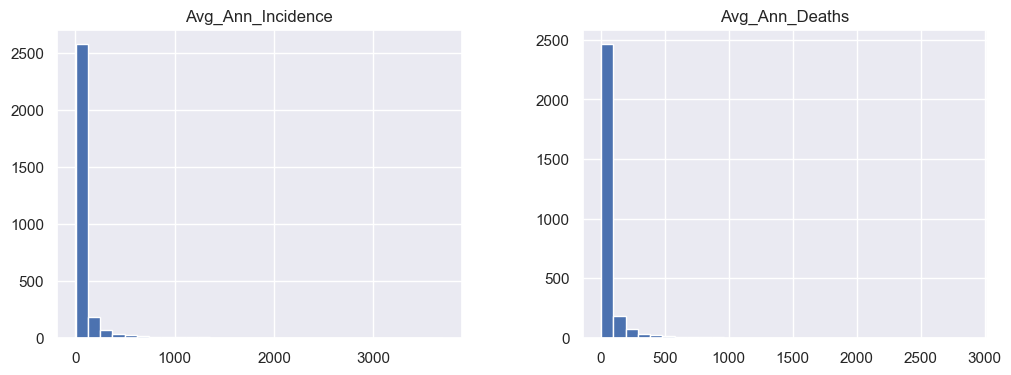

In [23]:
df[[ 'Avg_Ann_Incidence',  'Avg_Ann_Deaths']].hist(
                            bins=30, figsize=(12, 4))

In [24]:
# Handle Null values

# We replace with the emdian as these features are skweed
df['Avg_Ann_Incidence']  = df['Avg_Ann_Incidence'].fillna(df['Avg_Ann_Incidence'].median())

df['Avg_Ann_Deaths']     = df['Avg_Ann_Deaths'].fillna(df['Avg_Ann_Deaths'].median())

print(df['Avg_Ann_Incidence'].value_counts(dropna=False))
print("="*50)

print(df['Avg_Ann_Deaths'].value_counts(dropna=False))
print("="*50)


25.0     241
3.0      235
6.0       88
9.0       79
7.0       73
        ... 
682.0      1
212.0      1
206.0      1
236.0      1
658.0      1
Name: Avg_Ann_Incidence, Length: 359, dtype: int64
21.0     373
5.0      120
4.0      113
9.0       98
8.0       93
        ... 
512.0      1
199.0      1
262.0      1
185.0      1
170.0      1
Name: Avg_Ann_Deaths, Length: 305, dtype: int64


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3134 entries, 0 to 3133
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   State              3134 non-null   object 
 1   AreaName           3134 non-null   object 
 2   All_Poverty        3134 non-null   int64  
 3   M_Poverty          3134 non-null   int64  
 4   F_Poverty          3134 non-null   int64  
 5   FIPS               3134 non-null   int64  
 6   Med_Income         3134 non-null   float64
 7   Med_Income_White   3134 non-null   float64
 8   Med_Income_Black   3134 non-null   float64
 9   Med_Income_Nat_Am  3134 non-null   float64
 10  Med_Income_Asian   3134 non-null   float64
 11  Hispanic           3134 non-null   float64
 12  M_With             3134 non-null   int64  
 13  M_Without          3134 non-null   int64  
 14  F_With             3134 non-null   int64  
 15  F_Without          3134 non-null   int64  
 16  All_With           3134 

In [26]:
print(df['Mortality_Rate'].value_counts(dropna=False))

*       325
48.3     19
51.8     17
56.3     15
54.4     14
       ... 
81.3      1
31.5      1
32.1      1
75.8      1
83.6      1
Name: Mortality_Rate, Length: 618, dtype: int64


In [27]:
print(df['Incidence_Rate'].value_counts(dropna=False))

*         211
_         192
65.2       19
__         17
66.3       12
         ... 
69.7 #      1
71.4 #      1
60.7 #      1
45.3 #      1
23.7        1
Name: Incidence_Rate, Length: 813, dtype: int64


In [28]:
#based on  ata dictionary for the merged data replace * with 16
df['Mortality_Rate'] = Non_numbers_with_nan(df['Mortality_Rate'])
df['Mortality_Rate'] = df['Mortality_Rate'].fillna(16)
print(df['Mortality_Rate'].value_counts(dropna=False))

df['Incidence_Rate'] = Non_numbers_with_nan(df['Incidence_Rate'])
df['Incidence_Rate'] = df['Incidence_Rate'].fillna(16)
print(df['Incidence_Rate'].value_counts(dropna=False))

16.0    325
48.3     19
51.8     17
56.3     15
54.4     14
       ... 
81.3      1
31.5      1
32.1      1
75.8      1
83.6      1
Name: Mortality_Rate, Length: 618, dtype: int64
16.0     420
65.2      19
68.9      12
71.5      12
66.3      12
        ... 
123.2      1
113.0      1
95.3       1
94.5       1
23.7       1
Name: Incidence_Rate, Length: 740, dtype: int64


In [29]:
df['Incidence_Rate'].value_counts(dropna=False)

16.0     420
65.2      19
68.9      12
71.5      12
66.3      12
        ... 
123.2      1
113.0      1
95.3       1
94.5       1
23.7       1
Name: Incidence_Rate, Length: 740, dtype: int64

In [30]:
print(df['Incidence_Rate'].value_counts(dropna=False))

16.0     420
65.2      19
68.9      12
71.5      12
66.3      12
        ... 
123.2      1
113.0      1
95.3       1
94.5       1
23.7       1
Name: Incidence_Rate, Length: 740, dtype: int64


In [31]:
# These three columns display the same values so we can keep just one of them
df[['FIPS', 'fips_x', 'fips_y']].head()

,FIPS,fips_x,fips_y
0,2013,2013,2013
1,2016,2016,2016
2,2020,2020,2020
3,2050,2050,2050
4,2060,2060,2060


In [32]:
df.drop(['fips_x', 'fips_y'] ,axis=1, inplace=True)
df.head()

,State,AreaName,All_Poverty,M_Poverty,F_Poverty,FIPS,Med_Income,Med_Income_White,Med_Income_Black,Med_Income_Nat_Am,...,M_Without,F_With,F_Without,All_With,All_Without,Incidence_Rate,Avg_Ann_Incidence,recent_trend,Mortality_Rate,Avg_Ann_Deaths
0,AK,"Aleutians East Borough, Alaska",553,334,219,2013,61518.0,72639.0,31250.0,54750.0,...,1317,566,540,1442,1857,16.0,3.0,stable,16.0,21.0
1,AK,"Aleutians West Census Area, Alaska",499,273,226,2016,84306.0,97321.0,93750.0,48750.0,...,769,1707,564,4177,1333,16.0,3.0,stable,16.0,21.0
2,AK,"Anchorage Municipality, Alaska",23914,10698,13216,2020,78326.0,87235.0,50535.0,53935.0,...,23245,122426,21393,243173,44638,61.5,131.0,stable,47.3,96.0
3,AK,"Bethel Census Area, Alaska",4364,2199,2165,2050,51012.0,92647.0,73661.0,41594.0,...,2708,6627,1774,13023,4482,62.7,6.0,stable,58.3,5.0
4,AK,"Bristol Bay Borough, Alaska",69,33,36,2060,79750.0,88000.0,30000.0,63333.0,...,124,349,67,768,191,16.0,3.0,stable,16.0,21.0


In [33]:
print(sum(df['All_With'] == df['M_With'] + df['F_With'])       == len(df))
print(sum(df['All_Without']    == df['M_Without'] + df['F_Without']) == len(df))

True
True


In [34]:
# So from that we can drop all_with and All_Without, All_Poverty
df.drop(['All_Without', 'All_With', 'All_Poverty'],axis=1, inplace=True)
df.head()

,State,AreaName,M_Poverty,F_Poverty,FIPS,Med_Income,Med_Income_White,Med_Income_Black,Med_Income_Nat_Am,Med_Income_Asian,Hispanic,M_With,M_Without,F_With,F_Without,Incidence_Rate,Avg_Ann_Incidence,recent_trend,Mortality_Rate,Avg_Ann_Deaths
0,AK,"Aleutians East Borough, Alaska",334,219,2013,61518.0,72639.0,31250.0,54750.0,62679.0,51250.0,876,1317,566,540,16.0,3.0,stable,16.0,21.0
1,AK,"Aleutians West Census Area, Alaska",273,226,2016,84306.0,97321.0,93750.0,48750.0,81250.0,77500.0,2470,769,1707,564,16.0,3.0,stable,16.0,21.0
2,AK,"Anchorage Municipality, Alaska",10698,13216,2020,78326.0,87235.0,50535.0,53935.0,63757.0,53926.0,120747,23245,122426,21393,61.5,131.0,stable,47.3,96.0
3,AK,"Bethel Census Area, Alaska",2199,2165,2050,51012.0,92647.0,73661.0,41594.0,110625.0,160114.0,6396,2708,6627,1774,62.7,6.0,stable,58.3,5.0
4,AK,"Bristol Bay Borough, Alaska",33,36,2060,79750.0,88000.0,30000.0,63333.0,60405.0,25625.0,419,124,349,67,16.0,3.0,stable,16.0,21.0


In [35]:
df['AreaName'].value_counts()

Aleutians East Borough, Alaska    1
Putnam County, Ohio               1
Lorain County, Ohio               1
Lucas County, Ohio                1
Madison County, Ohio              1
                                 ..
Knox County, Kentucky             1
Larue County, Kentucky            1
Laurel County, Kentucky           1
Lawrence County, Kentucky         1
Weston County, Wyoming            1
Name: AreaName, Length: 3134, dtype: int64

# comment !

As we can see also we can drop AreaName, because it just the same as ids, and its has no effect on the data, although maybe we can get something from the State itself. 

In [36]:
# So from that we can drop all_with and All_Without
df.drop(['AreaName'],axis=1, inplace=True)
df.head()

,State,M_Poverty,F_Poverty,FIPS,Med_Income,Med_Income_White,Med_Income_Black,Med_Income_Nat_Am,Med_Income_Asian,Hispanic,M_With,M_Without,F_With,F_Without,Incidence_Rate,Avg_Ann_Incidence,recent_trend,Mortality_Rate,Avg_Ann_Deaths
0,AK,334,219,2013,61518.0,72639.0,31250.0,54750.0,62679.0,51250.0,876,1317,566,540,16.0,3.0,stable,16.0,21.0
1,AK,273,226,2016,84306.0,97321.0,93750.0,48750.0,81250.0,77500.0,2470,769,1707,564,16.0,3.0,stable,16.0,21.0
2,AK,10698,13216,2020,78326.0,87235.0,50535.0,53935.0,63757.0,53926.0,120747,23245,122426,21393,61.5,131.0,stable,47.3,96.0
3,AK,2199,2165,2050,51012.0,92647.0,73661.0,41594.0,110625.0,160114.0,6396,2708,6627,1774,62.7,6.0,stable,58.3,5.0
4,AK,33,36,2060,79750.0,88000.0,30000.0,63333.0,60405.0,25625.0,419,124,349,67,16.0,3.0,stable,16.0,21.0


In [37]:
df['State'].value_counts()

TX    254
GA    159
VA    132
KY    120
MO    115
KS    105
IL    102
NC    100
IA     99
TN     95
NE     93
IN     92
OH     88
MN     87
MI     83
MS     82
OK     77
AR     75
WI     72
FL     67
PA     67
AL     67
SD     65
LA     64
CO     64
NY     62
CA     58
MT     56
WV     55
ND     53
SC     46
ID     44
WA     39
OR     36
NM     33
UT     29
MD     24
AK     23
WY     23
NJ     21
NV     17
ME     16
AZ     15
MA     14
VT     14
NH     10
CT      8
RI      5
HI      5
DE      3
DC      1
Name: State, dtype: int64

Correlation matrix is : 


<AxesSubplot: >

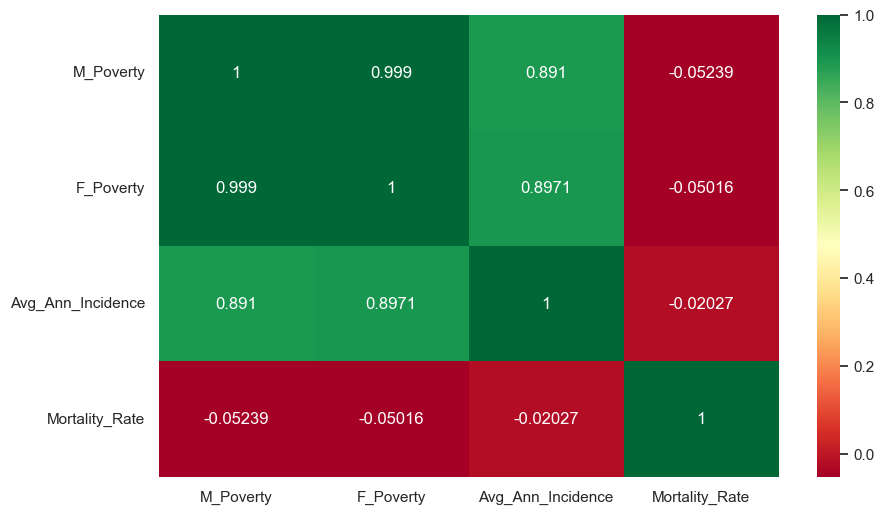

In [38]:
plt.figure(figsize=(10,6))
matrix = df[['M_Poverty', 'F_Poverty', 
            'Avg_Ann_Incidence','Mortality_Rate']].corr()
print("Correlation matrix is : ")
sns.heatmap(matrix,cmap="RdYlGn",annot=True, fmt='.4g')

array([[<AxesSubplot: title={'center': 'M_Poverty'}>,
        <AxesSubplot: title={'center': 'F_Poverty'}>],
       [<AxesSubplot: title={'center': 'M_With'}>,
        <AxesSubplot: title={'center': 'M_Without'}>],
       [<AxesSubplot: title={'center': 'Avg_Ann_Incidence'}>,
        <AxesSubplot: title={'center': 'Avg_Ann_Deaths'}>]], dtype=object)

<Figure size 1000x600 with 0 Axes>

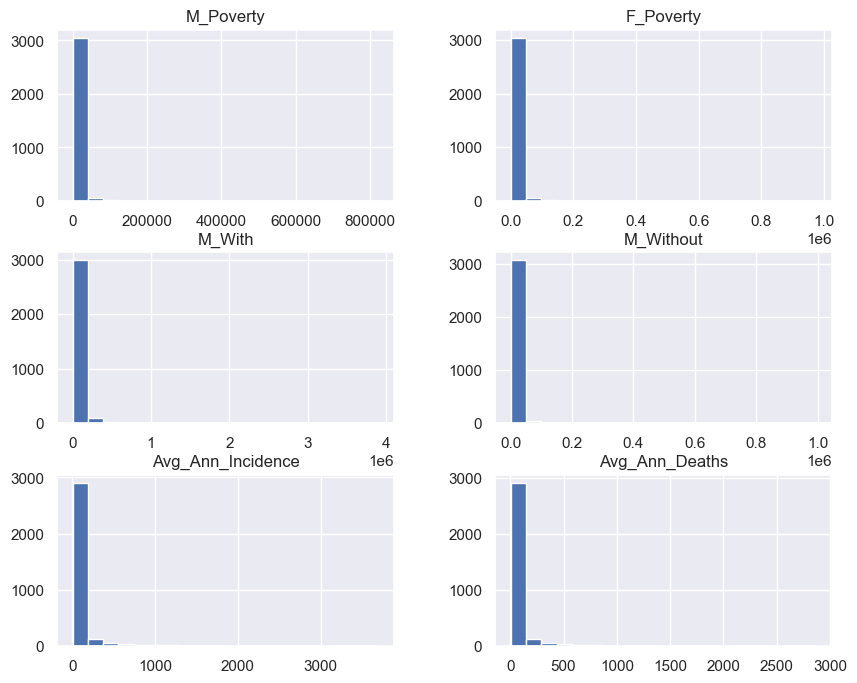

In [39]:
plt.figure(figsize=(10,6))
df[['M_Poverty', 'F_Poverty', 'M_With', 'M_Without',
            'Avg_Ann_Incidence', 'Avg_Ann_Deaths']].hist(bins=20, figsize=(10,8))

# Comment

We can see that the data very skewed to the right, so it will be more powerful to get the data in normal distribution shape.

As we cans see below we have transform the columns that seems to skewed either to left or right to normal distributed using log scaling.

In [44]:
log_transform = preprocessing.PowerTransformer(method='box-cox', standardize=False)
log_transform = log_transform.fit_transform(df[['M_Poverty', 'F_Poverty', 'M_With', 'M_Without',
            'Avg_Ann_Incidence', 'Avg_Ann_Deaths']])

array([[<AxesSubplot: title={'center': 'M_Poverty'}>,
        <AxesSubplot: title={'center': 'F_Poverty'}>],
       [<AxesSubplot: title={'center': 'M_With'}>,
        <AxesSubplot: title={'center': 'M_Without'}>],
       [<AxesSubplot: title={'center': 'Avg_Ann_Incidence'}>,
        <AxesSubplot: title={'center': 'Avg_Ann_Deaths'}>]], dtype=object)

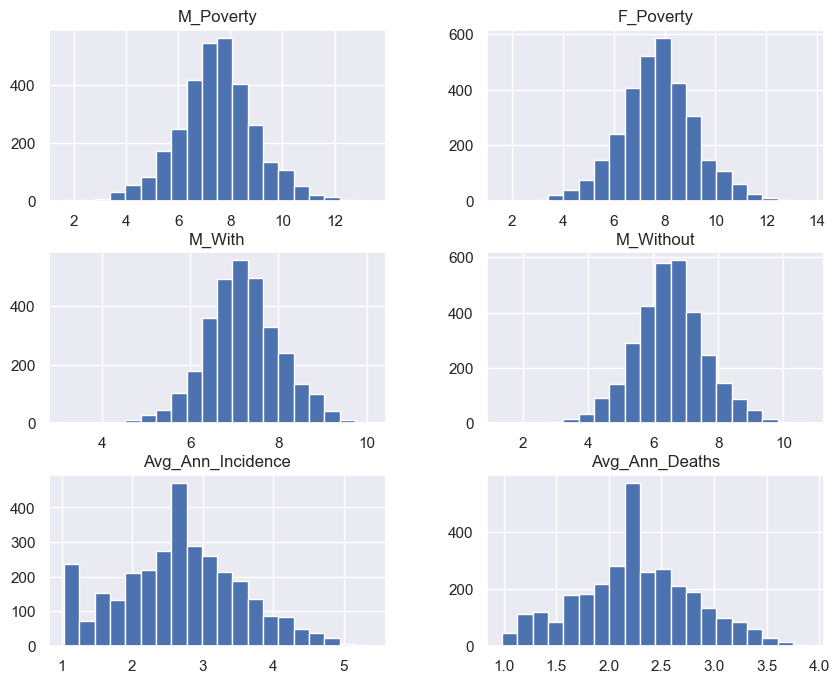

In [45]:
log_transform = pd.DataFrame(log_transform, columns=['M_Poverty', 'F_Poverty', 'M_With', 'M_Without',
            'Avg_Ann_Incidence', 'Avg_Ann_Deaths'])
log_transform.hist(bins=20, figsize=(10,8))

In [46]:
log_transform.head()

,M_Poverty,F_Poverty,M_With,M_Without,Avg_Ann_Incidence,Avg_Ann_Deaths
0,5.766244,5.368211,5.599848,6.292671,1.033895,2.257616
1,5.567630,5.399430,6.278214,5.878096,1.033895,2.257616
2,9.163722,9.424632,8.488215,8.368044,3.759435,2.951143
3,7.617150,7.637853,6.865869,6.835111,1.623884,1.368471
4,3.480220,3.574287,5.091711,4.407670,1.033895,2.257616


## Correlation

As our final prediction is tp predict the average death of people we need to check how this variables are correlated with other variables, so we can see how each of these variables affect that Avg_Ann_Deaths variable.

In [47]:
plt.figure(figsize=(10,6))
matrix = df[['Med_Income', 'Med_Income_White',
              'Med_Income_Black', 'Med_Income_Nat_Am', 'Med_Income_Asian', 
            'Avg_Ann_Incidence', 'Avg_Ann_Deaths']].corr()

matrix['Avg_Ann_Deaths'].sort_values(ascending=False)

Avg_Ann_Deaths       1.000000
Avg_Ann_Incidence    0.984177
Med_Income_White     0.270047
Med_Income           0.225074
Med_Income_Black     0.128901
Med_Income_Asian     0.083761
Med_Income_Nat_Am    0.033750
Name: Avg_Ann_Deaths, dtype: float64

<Figure size 1000x600 with 0 Axes>

In [48]:
df.head()

,State,M_Poverty,F_Poverty,FIPS,Med_Income,Med_Income_White,Med_Income_Black,Med_Income_Nat_Am,Med_Income_Asian,Hispanic,M_With,M_Without,F_With,F_Without,Incidence_Rate,Avg_Ann_Incidence,recent_trend,Mortality_Rate,Avg_Ann_Deaths
0,AK,334,219,2013,61518.0,72639.0,31250.0,54750.0,62679.0,51250.0,876,1317,566,540,16.0,3.0,stable,16.0,21.0
1,AK,273,226,2016,84306.0,97321.0,93750.0,48750.0,81250.0,77500.0,2470,769,1707,564,16.0,3.0,stable,16.0,21.0
2,AK,10698,13216,2020,78326.0,87235.0,50535.0,53935.0,63757.0,53926.0,120747,23245,122426,21393,61.5,131.0,stable,47.3,96.0
3,AK,2199,2165,2050,51012.0,92647.0,73661.0,41594.0,110625.0,160114.0,6396,2708,6627,1774,62.7,6.0,stable,58.3,5.0
4,AK,33,36,2060,79750.0,88000.0,30000.0,63333.0,60405.0,25625.0,419,124,349,67,16.0,3.0,stable,16.0,21.0


array([[<AxesSubplot: title={'center': 'Med_Income'}>,
        <AxesSubplot: title={'center': 'Med_Income_White'}>,
        <AxesSubplot: title={'center': 'Med_Income_Black'}>],
       [<AxesSubplot: title={'center': 'Med_Income_Nat_Am'}>,
        <AxesSubplot: title={'center': 'Med_Income_Asian'}>,
        <AxesSubplot: title={'center': 'Avg_Ann_Incidence'}>],
       [<AxesSubplot: title={'center': 'Avg_Ann_Deaths'}>,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

<Figure size 1000x600 with 0 Axes>

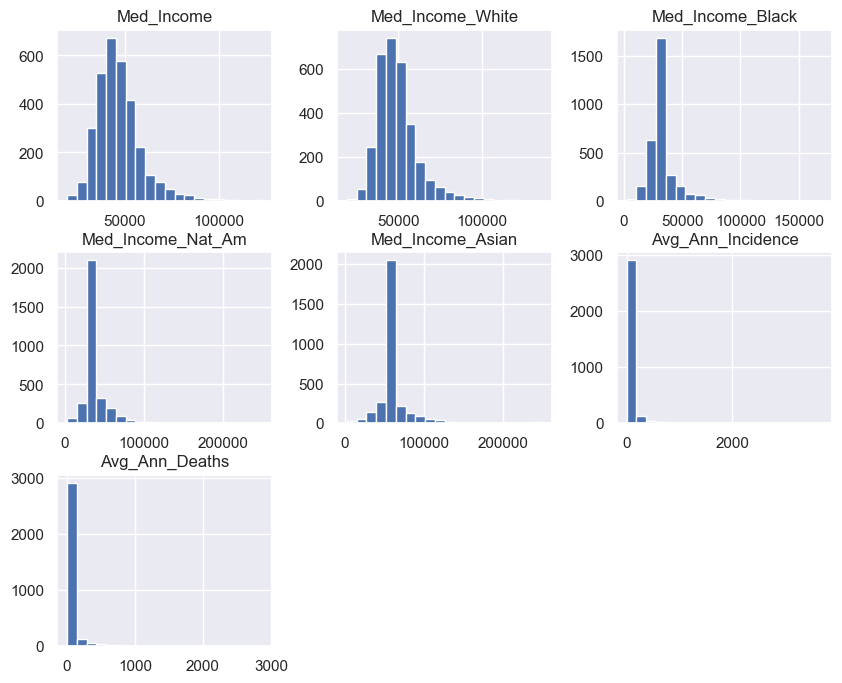

In [49]:
plt.figure(figsize=(10,6))
df[['Med_Income', 'Med_Income_White',
              'Med_Income_Black', 'Med_Income_Nat_Am', 'Med_Income_Asian', 
            'Avg_Ann_Incidence', 'Avg_Ann_Deaths']].hist(bins=20, figsize=(10,8))

array([[<AxesSubplot: title={'center': 'Med_Income'}>,
        <AxesSubplot: title={'center': 'Med_Income_White'}>,
        <AxesSubplot: title={'center': 'Med_Income_Black'}>],
       [<AxesSubplot: title={'center': 'Med_Income_Nat_Am'}>,
        <AxesSubplot: title={'center': 'Med_Income_Asian'}>,
        <AxesSubplot: title={'center': 'Avg_Ann_Incidence'}>],
       [<AxesSubplot: title={'center': 'Avg_Ann_Deaths'}>,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

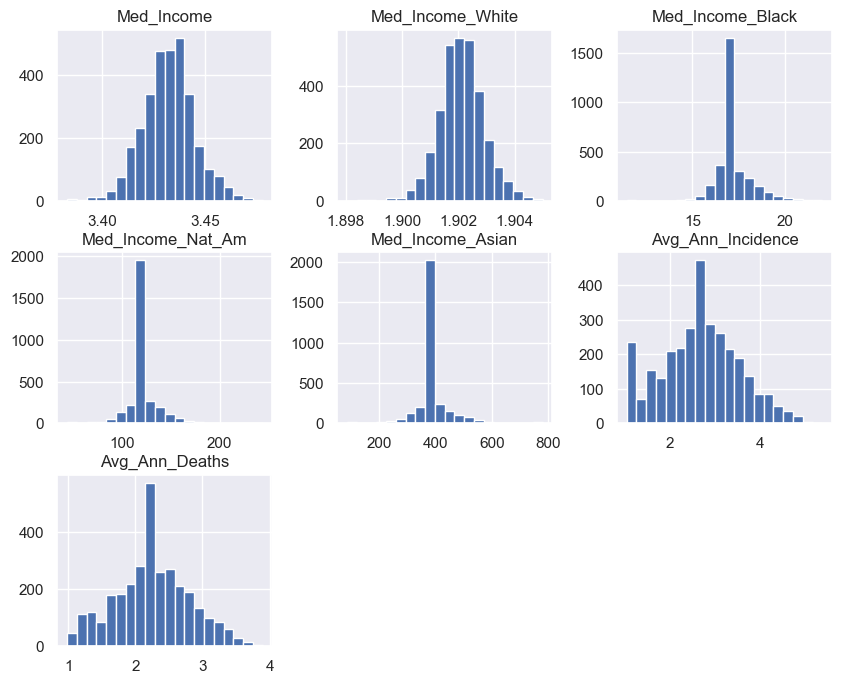

In [50]:
log_transform = preprocessing.PowerTransformer(method='box-cox', standardize=False)
log_transform = pt.fit_transform(df[['Med_Income', 'Med_Income_White',
              'Med_Income_Black', 'Med_Income_Nat_Am', 'Med_Income_Asian', 
            'Avg_Ann_Incidence', 'Avg_Ann_Deaths']])


log_transform = pd.DataFrame(log_transform, columns=['Med_Income', 'Med_Income_White',
              'Med_Income_Black', 'Med_Income_Nat_Am', 'Med_Income_Asian', 
            'Avg_Ann_Incidence', 'Avg_Ann_Deaths'])

log_transform.hist(bins=20, figsize=(10,8))

In [51]:
df_copy = df.copy()
df_copy.head()

,State,M_Poverty,F_Poverty,FIPS,Med_Income,Med_Income_White,Med_Income_Black,Med_Income_Nat_Am,Med_Income_Asian,Hispanic,M_With,M_Without,F_With,F_Without,Incidence_Rate,Avg_Ann_Incidence,recent_trend,Mortality_Rate,Avg_Ann_Deaths
0,AK,334,219,2013,61518.0,72639.0,31250.0,54750.0,62679.0,51250.0,876,1317,566,540,16.0,3.0,stable,16.0,21.0
1,AK,273,226,2016,84306.0,97321.0,93750.0,48750.0,81250.0,77500.0,2470,769,1707,564,16.0,3.0,stable,16.0,21.0
2,AK,10698,13216,2020,78326.0,87235.0,50535.0,53935.0,63757.0,53926.0,120747,23245,122426,21393,61.5,131.0,stable,47.3,96.0
3,AK,2199,2165,2050,51012.0,92647.0,73661.0,41594.0,110625.0,160114.0,6396,2708,6627,1774,62.7,6.0,stable,58.3,5.0
4,AK,33,36,2060,79750.0,88000.0,30000.0,63333.0,60405.0,25625.0,419,124,349,67,16.0,3.0,stable,16.0,21.0


In [52]:
df_copy.drop(['State', 'recent_trend'] ,axis=1, inplace=True)
df_copy.head()

,M_Poverty,F_Poverty,FIPS,Med_Income,Med_Income_White,Med_Income_Black,Med_Income_Nat_Am,Med_Income_Asian,Hispanic,M_With,M_Without,F_With,F_Without,Incidence_Rate,Avg_Ann_Incidence,Mortality_Rate,Avg_Ann_Deaths
0,334,219,2013,61518.0,72639.0,31250.0,54750.0,62679.0,51250.0,876,1317,566,540,16.0,3.0,16.0,21.0
1,273,226,2016,84306.0,97321.0,93750.0,48750.0,81250.0,77500.0,2470,769,1707,564,16.0,3.0,16.0,21.0
2,10698,13216,2020,78326.0,87235.0,50535.0,53935.0,63757.0,53926.0,120747,23245,122426,21393,61.5,131.0,47.3,96.0
3,2199,2165,2050,51012.0,92647.0,73661.0,41594.0,110625.0,160114.0,6396,2708,6627,1774,62.7,6.0,58.3,5.0
4,33,36,2060,79750.0,88000.0,30000.0,63333.0,60405.0,25625.0,419,124,349,67,16.0,3.0,16.0,21.0


In [53]:
# Let see some statical information about the numerical attributes
df_copy.describe()

,M_Poverty,F_Poverty,FIPS,Med_Income,Med_Income_White,Med_Income_Black,Med_Income_Nat_Am,Med_Income_Asian,Hispanic,M_With,M_Without,F_With,F_Without,Incidence_Rate,Avg_Ann_Incidence,Mortality_Rate,Avg_Ann_Deaths
count,3134.000000,3134.000000,3134.000000,3134.000000,3134.000000,3134.000000,3134.000000,3134.000000,3134.000000,3.134000e+03,3134.000000,3.134000e+03,3134.000000,3134.000000,3134.000000,3134.000000,3134.000000
mean,6828.800893,8400.855775,30426.019145,46819.281110,49488.867262,32916.213146,41034.517549,62605.374601,40516.059030,4.158963e+04,6930.955329,4.487357e+04,5968.701021,62.615858,68.006382,49.332036,52.211232
std,24719.078097,29865.855831,15124.491165,12244.465279,12457.638573,14444.307293,16396.919969,22677.576751,14405.512208,1.293894e+05,28686.089548,1.406455e+05,24657.276997,24.749028,167.336120,17.473169,121.369810
min,5.000000,5.000000,1001.000000,19328.000000,19340.000000,2499.000000,2499.000000,2499.000000,2499.000000,3.200000e+01,4.000000,3.300000e+01,4.000000,13.500000,3.000000,9.200000,3.000000
25%,758.750000,957.000000,19001.500000,38826.250000,41394.250000,27342.000000,39014.000000,60405.000000,33750.000000,4.506750e+03,750.000000,4.657500e+03,633.000000,50.725000,11.000000,40.125000,11.000000
50%,1925.000000,2372.000000,29180.000000,45075.000000,47430.000000,30000.000000,39014.000000,60405.000000,38347.000000,1.040450e+04,1763.000000,1.110800e+04,1529.000000,66.300000,25.000000,50.600000,21.000000
75%,4697.500000,5812.500000,45080.500000,52223.250000,54526.000000,32345.250000,39014.000000,60405.000000,44216.500000,2.788775e+04,4407.250000,2.976475e+04,3834.000000,78.175000,56.000000,59.900000,42.750000
max,823612.000000,976653.000000,56045.000000,123453.000000,136311.000000,170195.000000,250001.000000,250001.000000,223750.000000,3.904322e+06,997326.000000,4.230137e+06,837175.000000,203.700000,3701.000000,125.600000,2876.000000


In [56]:
X_train, X_test, y_train, y_test = train_test_split(df_copy.iloc[:, :-1], df_copy.iloc[:, -1], test_size=0.2, 
                                                    random_state=42)

In [57]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2507, 16)
(627, 16)
(2507,)
(627,)


In [58]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [59]:
# Now lets do it on the whole dataset
predictions = lin_reg.predict(X_train)
error = mean_squared_error(predictions, y_train)
error

358.0676591105343

In [60]:
# Now lets do it on the whole dataset
predictions = lin_reg.predict(X_test)
error = mean_squared_error(predictions, y_test)
error

235.82452359900995